# Analysis of Factors Affecting Cardiovascular Health Among Men and Women

## 1. Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
cn = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal','dx']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 names=cn)
df.head(3)


,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [3]:
df.shape

(303, 14)

In [4]:
df.dtypes

age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess        object
thal                object
dx                   int64
dtype: object

In [5]:
      df[(df['age'] == '?') |
                (df['sex'] == '?') |
                (df['chest_pain_type'] == '?') |
                (df['restbps'] == '?') |  
                (df['chol'] == '?') |
                 (df['chest_pain_type'] == '?') |
                (df['restecg'] == '?') |
                (df['max_heartrate'] == '?') |
                (df['exang'] == '?') |
                (df['oldpeak'] == '?') |
                (df['slope'] == '?') |
                (df['num_mjr_vess'] == '?') |
                (df['thal'] == '?') |
                (df['dx'] == '?')]

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
df[(df=='?')] = np.nan

In [7]:
   df[(df['age'] == '?') |
                (df['sex'] == '?') |
                (df['chest_pain_type'] == '?') |
                (df['restbps'] == '?') |  
                (df['chol'] == '?') |
                 (df['chest_pain_type'] == '?') |
                (df['restecg'] == '?') |
                (df['max_heartrate'] == '?') |
                (df['exang'] == '?') |
                (df['oldpeak'] == '?') |
                (df['slope'] == '?') |
                (df['num_mjr_vess'] == '?') |
                (df['thal'] == '?') |
                (df['dx'] == '?')]

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx


In [8]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       4
thal               2
dx                 0
dtype: int64

## 2. Preprocess the data

Since there are Nan values in columns num_mjr_vess and thal , dropping those columns for preprocessing

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       0
thal               0
dx                 0
dtype: int64

converting thal and num_mjr_vess to numeric datatype

In [11]:
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['num_mjr_vess'] = pd.to_numeric(df['num_mjr_vess'], errors='coerce')
df.dtypes


age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess       float64
thal               float64
dx                   int64
dtype: object

dx: diagnosis of heart disease (angiographic disease status).
This column provides the severity of heart patient ranging from (0 to 4) where 0 is abcense of  heart disease and 4 is the highest severity of heart disease


In [12]:
df['dx'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: dx, dtype: int64

To simplify our analysis we are creating other column named "heart_dx" based on "dx" where the values are 0 and 1 .
0 = No heart disease
1 = Has heart disease ( 1,2,3,4)

In [13]:
df['heart_dx'] = df['dx'].apply(lambda x: 1 if x >= 1 else 0)
df['heart_dx'].value_counts()

0    160
1    137
Name: heart_dx, dtype: int64

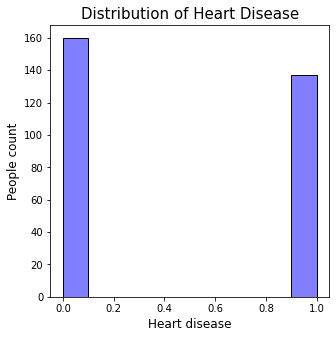

In [14]:
#Histogram of people without heart disease vs people with heart disease
plt.figure(figsize=(5,5))
sns.histplot(data=df["heart_dx"], alpha=0.5 ,color="blue")
plt.xlabel("Heart disease",fontsize=12)
plt.ylabel("People count", fontsize=12)
plt.title("Distribution of Heart Disease", fontsize=15)
plt.show()

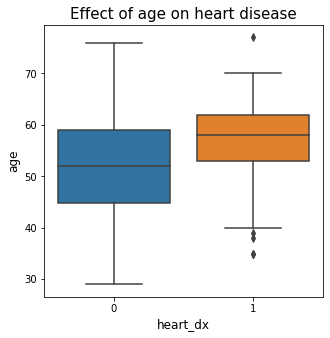

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot (x="heart_dx",y='age',data=df)
plt.xlabel("heart_dx",fontsize=12)
plt.ylabel("age", fontsize=12)
plt.title("Effect of age on heart disease", fontsize=15)
plt.show()


It is seen from the above diagram that a people of higher age has high probability of getting heart disease

Creating specific columns for Men and Women to use in later analysis

<AxesSubplot:>

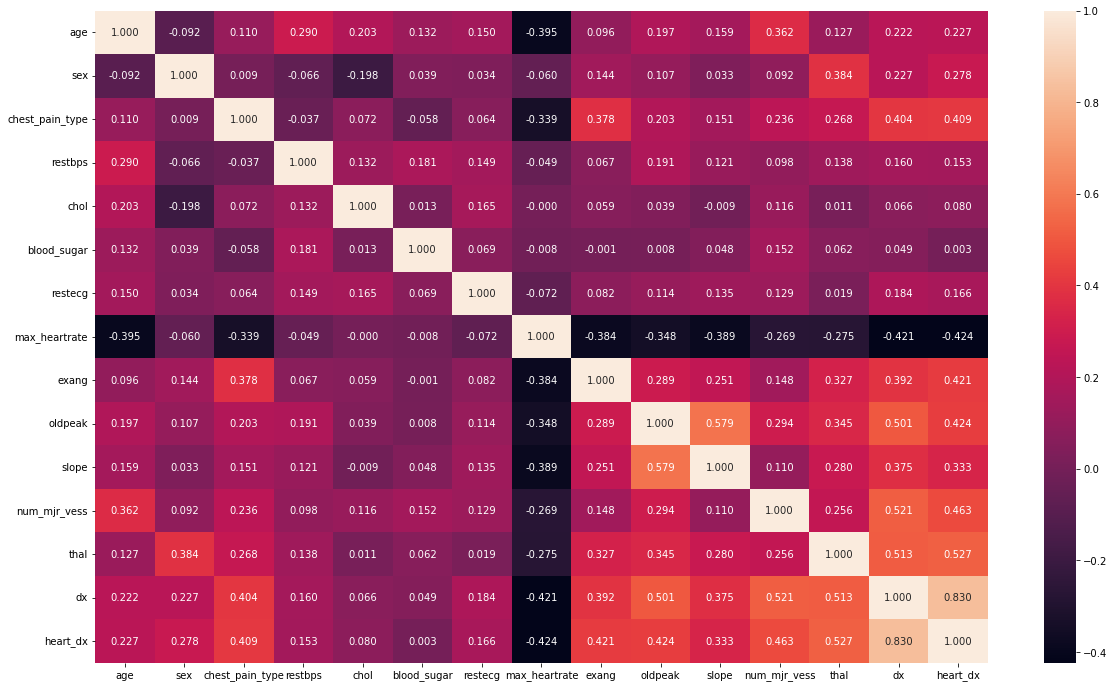

In [16]:
plt.figure( figsize = (20, 12) )
sns.heatmap(df.corr(), annot=True, fmt=".3f")

In [17]:
df['Men'] = df['sex'] == 1 # Males
df['Women'] = df['sex'] == 0 # Females
df['Men'] = pd.to_numeric(df['Men'], errors='coerce')
df['Women'] = pd.to_numeric(df['Women'], errors='coerce')
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,True,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,True,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,True,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,True,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,False,True


## 3.LOGISTIC REGRESSION MODEL based on Sex

### model_all - Logistic regression model comparing all attributes

In [18]:
model_all = 'heart_dx ~ \
                 age + sex + chest_pain_type + restbps + chol + blood_sugar + \
                 restecg + max_heartrate + slope + exang + oldpeak + thal + num_mjr_vess + age:sex'

result_all = smf.logit(formula=model_all, data=df).fit()
print(result_all.summary())

Optimization terminated successfully.
         Current function value: 0.344542
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5008
Time:                        12:40:39   Log-Likelihood:                -102.33
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.557e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.7130      3.492     -2.209      0.027     -14.556      -0.870
age           

We used above model to determine significant attributes considering alpha=0.05.Based on the results, we found that the significant factors are chest_pain_type, slope, num_mjr_vess, thal, restbps, and oldpeak.

### model_1 - Logistic regression model on age, sex, chol, blood_sugar, restecg, slope, and age:sex interaction


In [19]:
model_1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak + thal + num_mjr_vess'
result_1 = smf.logit(formula=model_1, data=df).fit()
print(result_1.summary())

Optimization terminated successfully.
         Current function value: 0.371360
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4619
Time:                        12:40:39   Log-Likelihood:                -110.29
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.051e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.7809      1.986     -2.407      0.016      -8.674      -0.888
chest_pain_typ

From the above reults,it is shown that restbps was no longer considered a significant factor anymore. Therefore, it was removed from the next model, model_2.

### model_2¶- Logistic regression model on chest_pain_type, max_heartrate, exang, oldpeak

In [20]:
model_2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak + thal + num_mjr_vess'
result_2 = smf.logit(formula=model_2, data=df).fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.376102
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4550
Time:                        12:40:39   Log-Likelihood:                -111.70
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.383e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8815      1.606     -1.794      0.073      -6.029       0.266
chest_pain_typ

# model_Men_all - Logistic regression model on Male comparing all attributes

In [21]:
model_Men_all = 'heart_dx ~ age + Men + \
                            chest_pain_type + restbps + chol + blood_sugar + \
                            restecg + max_heartrate + slope + exang + oldpeak + thal + num_mjr_vess + Men:age'

result_men_all = smf.logit(formula=model_Men_all, data=df).fit()
print(result_men_all.summary())


Optimization terminated successfully.
         Current function value: 0.344542
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5008
Time:                        12:40:39   Log-Likelihood:                -102.33
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.557e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.7130      3.492     -2.209      0.027     -14.556      -0.870
Men[T.True]   

The above model is used to determine significant factors for Men causing heart diseas considering alpha=0.05.
Based on the results, we found that the significant factors are the same as the above models: chest pain type, max heartrate, restbps, exang, and oldpeak. 
Likewise, instead of an interaction effect on Age and Sex, I used Men (males) and Age as the interaction effect.
It proved to have no significance either.
It is also noticed thatage and sex are not a significant factor like model_all

### model_Men1 - Logistic regression model on age, male, chol, blood_sugar, restecg, slope, and male:sex interaction

In [22]:
model_Men1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + thal + num_mjr_vess'

result_men1 = smf.logit(formula=model_Men1, data=df[df['Men'] == True]).fit()
print(result_men1.summary())

Optimization terminated successfully.
         Current function value: 0.413822
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  201
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3973
Time:                        12:40:39   Log-Likelihood:                -83.178
converged:                       True   LL-Null:                       -138.00
Covariance Type:            nonrobust   LLR p-value:                 2.412e-21
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6661      2.309     -0.288      0.773      -5.192       3.860
chest_pain_typ

In the above model, all the insiginificant factors, including the interaction effect are removed.
That left the following factors to be considered significant: Chest pain type, max heartrate, exang, and oldpeak. This is the same results as in Model_1. Removing the factor restbps as a factor before running the final model, model_Men2.


### model_Men2 - Logistic regression model on Male, chest_pain_type, max_heartrate, exang, oldpeak

In [23]:
model_Men2 = 'heart_dx ~ chest_pain_type + max_heartrate + thal + num_mjr_vess'
result_men2 = smf.logit(formula=model_Men2, data=df[df['Men'] == True]).fit()
print(result_men2.summary())

Optimization terminated successfully.
         Current function value: 0.421884
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  201
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3855
Time:                        12:40:39   Log-Likelihood:                -84.799
converged:                       True   LL-Null:                       -138.00
Covariance Type:            nonrobust   LLR p-value:                 4.240e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7399      1.789      0.973      0.331      -1.767       5.247
chest_pain_typ

### model_W_all - Logistic regression model on Female comparing all attributes

In [24]:
model_W_all = 'heart_dx ~ age + Women + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + thal + num_mjr_vess + Women:age'

result_W_all = smf.logit(formula=model_W_all, data=df).fit()
print(result_W_all.summary())

Optimization terminated successfully.
         Current function value: 0.344542
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5008
Time:                        12:40:39   Log-Likelihood:                -102.33
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.557e-36
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.9254      2.870     -2.065      0.039     -11.550      -0.301
Women[T.

### model_W1 - Logistic regression model on age, women, chol, blood_sugar, restecg, slope, and male:sex interaction¶

In [25]:
model_W1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + thal + num_mjr_vess'

result_W1 = smf.logit(formula=model_W1, data=df[df['Women'] == True]).fit()
print(result_W1.summary())


Optimization terminated successfully.
         Current function value: 0.233870
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                   96
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5922
Time:                        12:40:39   Log-Likelihood:                -22.452
converged:                       True   LL-Null:                       -55.055
Covariance Type:            nonrobust   LLR p-value:                 3.913e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -16.3930      6.608     -2.481      0.013     -29.344      -3.442
chest_pain_typ

### model_W2 -  Logistic regression model on Women, chest_pain_type, max_heartrate, exang, oldpeak¶

This model shows that oldpeak and max_heartrate are no longer a significant factors.

In [26]:
model_W2 = 'heart_dx ~ chest_pain_type + exang + thal + num_mjr_vess'

result_W2 = smf.logit(formula=model_W2, data=df[df['Women'] == True]).fit()
print(result_W2.summary())

Optimization terminated successfully.
         Current function value: 0.253108
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                   96
Model:                          Logit   Df Residuals:                       91
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5587
Time:                        12:40:39   Log-Likelihood:                -24.298
converged:                       True   LL-Null:                       -55.055
Covariance Type:            nonrobust   LLR p-value:                 1.394e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.6384      2.335     -4.128      0.000     -14.215      -5.062
chest_pain_typ

<Figure size 576x432 with 0 Axes>

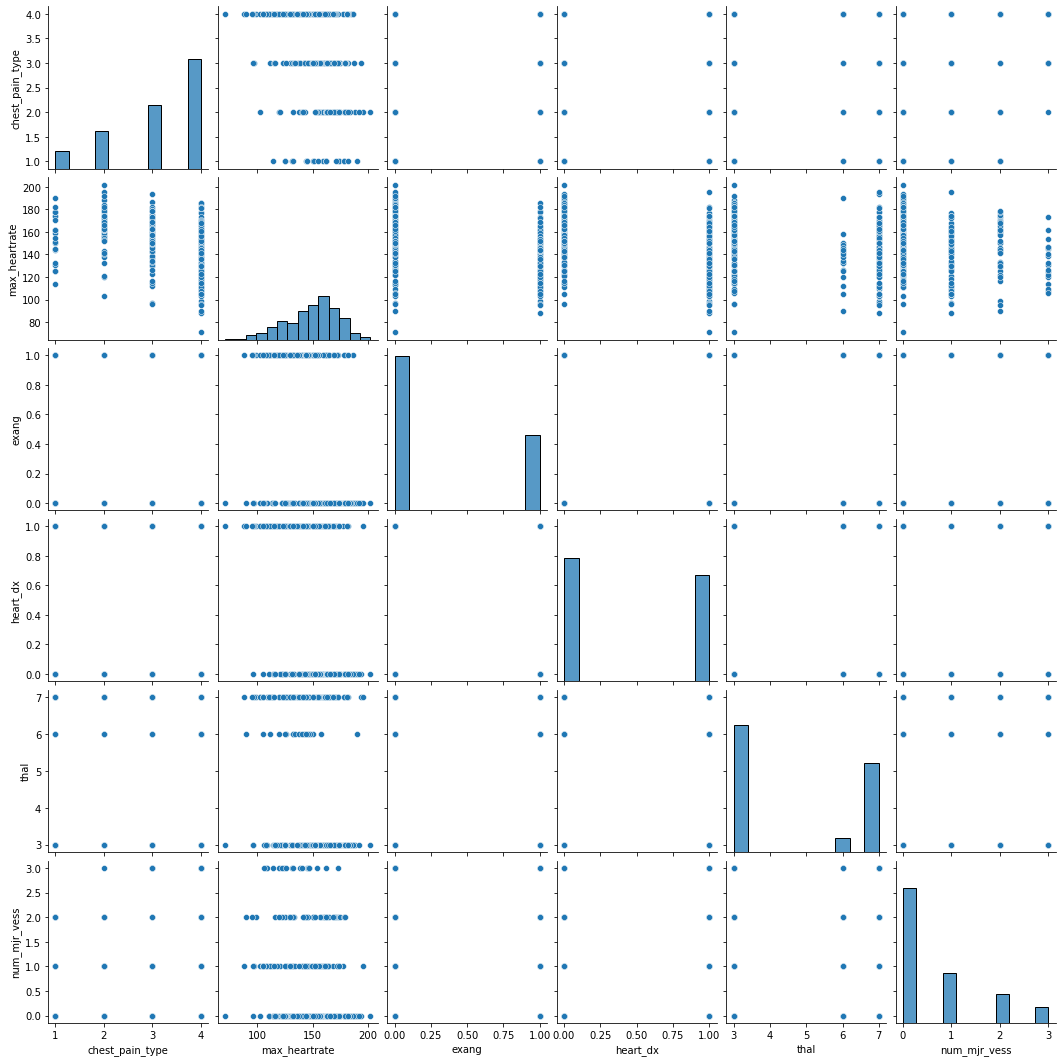

In [27]:
plt.figure(figsize=(8,6))
sns.pairplot(df[['chest_pain_type','max_heartrate','exang','heart_dx', 'thal', 'num_mjr_vess']],palette=['orange'])
plt.show()
# added  + thal + num+mjr_vess

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


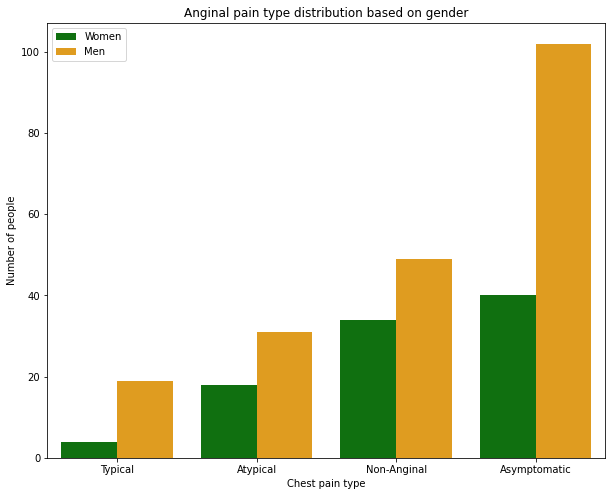

In [28]:
plt.figure(figsize=(10,8))
g = sns.countplot("chest_pain_type", hue="sex", data=df,palette=['green','orange'])
g.set_xticklabels(["Typical","Atypical","Non-Anginal","Asymptomatic"])
plt.legend(["Women", "Men"])
plt.xlabel("Chest pain type")
plt.ylabel("Number of people")
plt.title("Anginal pain type distribution based on gender")
plt.show()

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


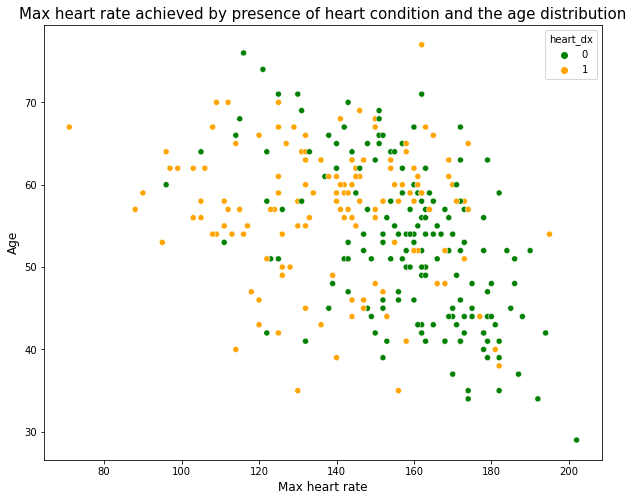

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot("max_heartrate", "age", hue=df["heart_dx"], data=df , palette=['green','orange'])
plt.xlabel("Max heart rate", fontsize=12)
plt.ylabel("Age" , fontsize=12)
plt.title("Max heart rate achieved by presence of heart condition and the age distribution", fontsize=15)
plt.show()

## 4 . Logistic Regression model based on Age group

### Creating Age Ranges for Each of the Listed Individuals in the study.

we wanted to understand the number of individuals per age groupping.

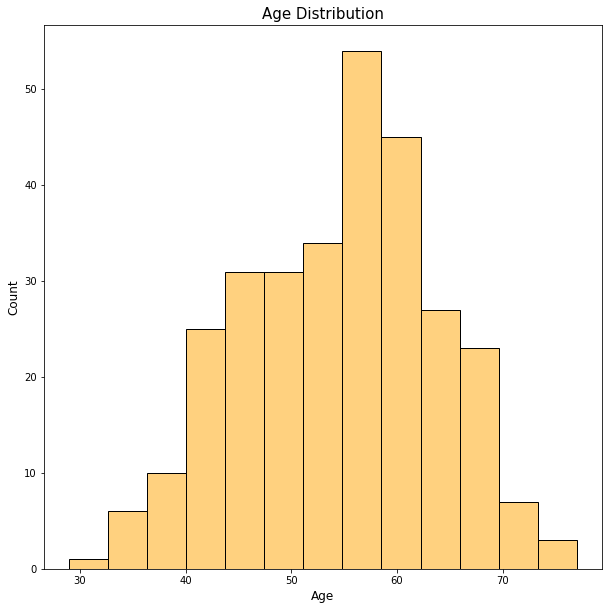

In [30]:
#Histogram of distribution of age
plt.figure(figsize=(10,10))
sns.histplot(data=df["age"], alpha=0.5 ,color="orange")
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution", fontsize=15)
plt.show()

In [31]:
df[df['age'].between(29,45)].shape[0]

61

In [32]:
df[df['age'].between(46, 60)].shape[0]

157

In [33]:
df[df['age'].between(61,77)].shape[0]

79

In [34]:
df[df['age'].between(62, 77)].shape[0]

71

 Created columns to identify which age group each person belonged to

In [35]:
df['Age_low'] = df['age'].between(29, 45)
df['Age_med'] = df['age'].between(46, 61) #smallest range but biggest volume
df['Age_high'] = df['age'].between(62, 77)
df.tail()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women,Age_low,Age_med,Age_high
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1,False,True,False,True,False
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,True,False,True,False,False
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,True,False,False,False,True
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,True,False,False,True,False
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,False,True,False,True,False


### model_Age_low

This model shows what factors are significant factors for Lower Age range, 29 - 45. We used alpha=0.05 to determine each factors significance. 

In [36]:
model_Age_low = 'heart_dx ~ Age_low + sex + chest_pain_type + restbps + chol + \
blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + thal + num_mjr_vess + Age_low:sex'


result_Age_low = smf.logit(formula=model_Age_low, data=df).fit() 
print(result_Age_low.summary())

#added thal and num mjr vess

Optimization terminated successfully.
         Current function value: 0.344189
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5013
Time:                        12:40:41   Log-Likelihood:                -102.22
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.129e-36
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.0042      2.524     -3.172      0.002     -12.950      -3.058
Ag

we found that the significant factors are slightly different than the others. We found that the significant factors are sex, chest pain type, restbps, exang, thal, and number major vessels.

### model_Age_low_sex

This model is slighly different than the previous. I included sex, with the same factors, it seems to be more significant.

In [37]:
model_Age_low_sex = 'heart_dx ~ sex + chest_pain_type + restbps + exang + thal + num_mjr_vess'

result_Age_low_sex = smf.logit(formula=model_Age_low_sex, data=df).fit()
print(result_Age_low_sex.summary())

Optimization terminated successfully.
         Current function value: 0.386825
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4395
Time:                        12:40:41   Log-Likelihood:                -114.89
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.119e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.6486      1.583     -5.463      0.000     -11.751      -5.546
sex           

### model_Age_med

This model shows what factors are significant factors for Medium Age range, 46 - 61. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to model_Age1 but still different.

In [38]:
model_Age_med = 'heart_dx ~ Age_med + sex + chest_pain_type + restbps + chol + \
max_heartrate + slope + exang + oldpeak + thal + num_mjr_vess + Age_med:sex'

result_Age_med = smf.logit(formula=model_Age_med, data=df).fit()
print(result_Age_med.summary())

Optimization terminated successfully.
         Current function value: 0.346859
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4974
Time:                        12:40:41   Log-Likelihood:                -103.02
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 5.076e-37
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.4364      2.532     -3.332      0.001     -13.399      -3.474
Ag

We found that the significant factors are age_med, sex, chest pain type, max heartrate, exang, thal, and number major vessels.

### model_Age_med_sex 

In [39]:
model_Age_med_sex = 'heart_dx ~ Age_med + sex + chest_pain_type + max_heartrate + exang + thal + num_mjr_vess'

result_Age2a = smf.logit(formula=model_Age_med_sex, data=df).fit()
print(result_Age2a.summary())

Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4501
Time:                        12:40:41   Log-Likelihood:                -112.71
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.149e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8573      1.548     -1.200      0.230      -4.890       1.176
Age_med[T.True

### model_Age_high

This model shows what factors are significant factors for Medium Age range, 62 - 77. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to *model_Age_low*. We found that the significant factors are sex, chest pain type, restbps, max heartrate, exang, and oldpeak. 


In [40]:
model_Age_high = 'heart_dx ~ Age_high + sex + chest_pain_type + restbps + chol + max_heartrate + \
slope + exang + oldpeak + thal + num_mjr_vess'

result_Age_high = smf.logit(formula=model_Age_high, data=df).fit()
print(result_Age_high.summary())


Optimization terminated successfully.
         Current function value: 0.349042
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           11
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4942
Time:                        12:40:41   Log-Likelihood:                -103.67
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.131e-37
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.2113      2.429     -2.969      0.003     -11.971      -2.451
Age_high[T.

In [41]:
model_Age3a = 'heart_dx ~ sex + chest_pain_type + restbps + max_heartrate + exang + thal + num_mjr_vess'

result_Age3a = smf.logit(formula=model_Age3a, data=df).fit()
print(result_Age3a.summary())


Optimization terminated successfully.
         Current function value: 0.371842
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4612
Time:                        12:40:41   Log-Likelihood:                -110.44
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.357e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.7038      2.007     -2.344      0.019      -8.637      -0.770
sex           

### Validation of 3 models based on factors that were found significant.

In [42]:
Xo = df[['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal']]

yo = df['heart_dx']


X_train, X_test, y_train, y_test = train_test_split(Xo, yo, random_state=40) 

X_test.shape

(75, 13)

In [43]:

model = LogisticRegression()

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:,1]

y_pred = model.predict(X_test)

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred) 

df_cm = pd.DataFrame(data=cm, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,33,2
true: Heart Disease,8,32


In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.94      0.80      0.86        40

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.88      0.87      0.87        75



In [46]:
Xo2 = df[['sex','chest_pain_type','restbps','max_heartrate','exang','thal','num_mjr_vess']]

yo2 = df['heart_dx']

X_train, X_test, y_train, y_test = train_test_split(Xo2, yo2, random_state=68) 

X_test.shape

model2 = LogisticRegression()

model2.fit(X_train, y_train)

y_proba2 = model2.predict_proba(X_test)[:,1]

y_pred2 = model2.predict(X_test)

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
cm2 = metrics.confusion_matrix(y_test, y_pred2) 

df_cm2 = pd.DataFrame(data=cm2, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm2

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,41,1
true: Heart Disease,7,26


In [48]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.96      0.79      0.87        33

    accuracy                           0.89        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75



In [49]:
Xo3 = df[['age','chest_pain_type', 'restbps','max_heartrate','exang','thal','num_mjr_vess']]

yo3 = df['heart_dx']


X_train, X_test, y_train, y_test = train_test_split(Xo3, yo3, random_state=33) 

X_test.shape


model3 = LogisticRegression()

model3.fit(X_train, y_train)

y_proba3 = model3.predict_proba(X_test)[:,1]

y_pred3 = model3.predict(X_test)


/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
cm3 = metrics.confusion_matrix(y_test, y_pred3) 

df_cm3 = pd.DataFrame(data=cm3, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm3

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,33,5
true: Heart Disease,7,30


In [51]:
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.86      0.81      0.83        37

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



/Users/ted/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


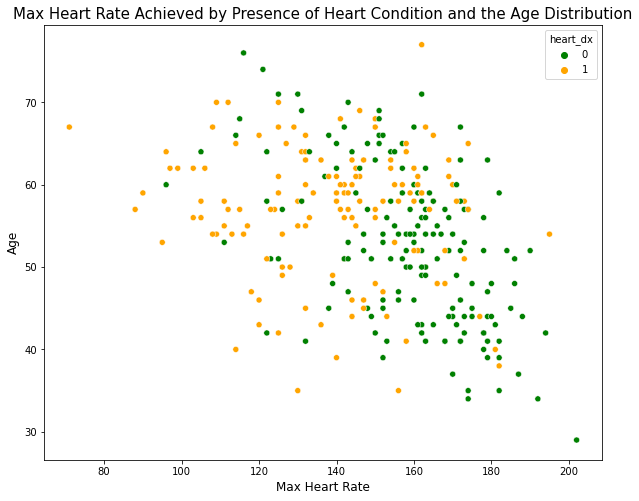

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot("max_heartrate", "age", hue=df["heart_dx"], data=df , palette=['green','orange'])
plt.xlabel("Max Heart Rate", fontsize=12)
plt.ylabel("Age" , fontsize=12)
plt.title("Max Heart Rate Achieved by Presence of Heart Condition and the Age Distribution", fontsize=15)
plt.show()

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


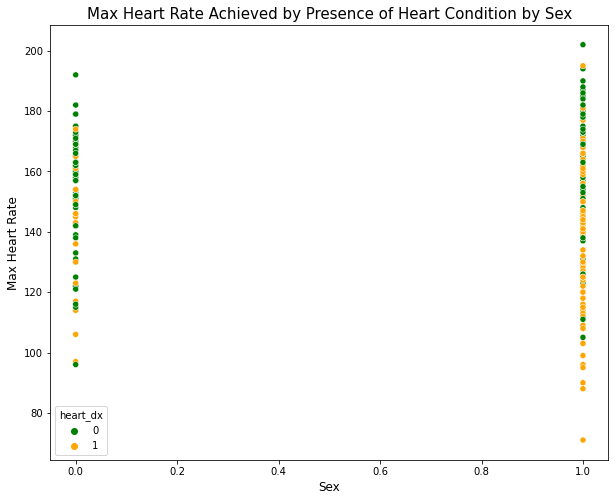

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot("sex", "max_heartrate", hue=df["heart_dx"], data=df , palette=['green','orange'])
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Max Heart Rate" , fontsize=12)
plt.title("Max Heart Rate Achieved by Presence of Heart Condition by Sex", fontsize=15)
plt.show()

### StatsModel Conclusions


The major factors to classifying heart disease are chest_pain_type, exang, thal, and num_mjr_vess. However, when we analyzed the data specifically based on sex and age ranges and for each regression model, there were slight differences.

For the different sexes, the significant factors varied based on data group, Men or Women. In the statsmodel for men, max heart rate remained a significant factor, whereas with the women's model, it did not. Though, we specifically looked at men and women independently, this could have skewed some results.

The middle age group, 46 - 61, and high age group, 62 - 77, found that sex was a significant factor. This age group had the largest population. This could indicate that this sex range is more significant to diagnosis at this age.

I used the metrics function to assess the most accurate model, it seems that according to the statsmodel, leaving sex in as a significant factor increases the accruacy, Precision, Recall, and F1-Score are all almost the same otherwise. This makes for a slighlty inconclusive results to our original question regarding age. However, when assessing differences based on sex, we found that max heart rate could be a differing factor.

## 5. Pipeline

In order to determine the best models. We decided to run two 3 pipeline using logistic regression, one using the following factors for each pipeline.

- Pipeline1: Factors = chest_pain_type, max_heartrate, exang, oldpeak
- Pipeline2: Factors = sex, chest_pain_type, max_heartrate, exang, oldpeak
- Pipeline3: Factors = sex, chest_pain_type, chol, max_heartrate, exang, oldpeak

In [54]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
cn = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal','dx']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=cn)
df['sex'] = df['sex'].astype(object)
df['chest_pain_type'] = df['chest_pain_type'].astype(object)
df['restecg'] = df['restecg'].astype(object)
df['exang'] = df['exang'].astype(object)
df['slope'] = df['slope'].astype(object)

df['heart_dx'] = df['dx'].apply(lambda x: 1 if x >= 1 else 0)

df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


### Pipeline 1

This pipeline includes all provided possible factors from the data set: age, sex, chest pain type, restbps, chol, blood sugar, restecg, max heartrate, exang, old peak, slope, number of major vessels, and thal. 

In [56]:
features = df[['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal']]

X = features

y = df['heart_dx']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.20,
                                                    stratify=y,
                                                    random_state=88
                                                   )
X_test.shape

(61, 13)

#### Preprocessing pipeline

In [57]:
from sklearn.impute import SimpleImputer

cat_imputed = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['sex', 'chest_pain_type', 'restecg', 'exang', 'slope', 'num_mjr_vess','thal']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed)

enc.categories_

[array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0, 2.0], dtype=object),
 array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0], dtype=object),
 array(['0.0', '1.0', '2.0', '3.0'], dtype=object),
 array(['3.0', '6.0', '7.0'], dtype=object)]

In [58]:
SimpleImputer(strategy='mean').fit_transform(df[['age','restbps','chol','blood_sugar','max_heartrate','oldpeak']]

)

array([[ 63. , 145. , 233. ,   1. , 150. ,   2.3],
       [ 67. , 160. , 286. ,   0. , 108. ,   1.5],
       [ 67. , 120. , 229. ,   0. , 129. ,   2.6],
       ...,
       [ 57. , 130. , 131. ,   0. , 115. ,   1.2],
       [ 57. , 130. , 236. ,   0. , 174. ,   0. ],
       [ 38. , 138. , 175. ,   0. , 173. ,   0. ]])

In [59]:
StandardScaler().fit_transform(df[['age','restbps','chol','blood_sugar','max_heartrate','oldpeak']]

)

array([[ 0.94872647,  0.75752504, -0.2649003 ,  2.394438  ,  0.01719733,
         1.08733806],
       [ 1.39200191,  1.61121989,  0.76041519, -0.41763453, -1.82190531,
         0.39718162],
       [ 1.39200191, -0.6652997 , -0.34228261, -0.41763453, -0.90235399,
         1.34614673],
       ...,
       [ 0.28381332, -0.0961698 , -2.23814899, -0.41763453, -1.51538821,
         0.13837295],
       [ 0.28381332, -0.0961698 , -0.20686358, -0.41763453,  1.06811312,
        -0.89686172],
       [-1.82174501,  0.35913411, -1.38694368, -0.41763453,  1.02432497,
        -0.89686172]])

In [60]:
# Begin making the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor = make_column_transformer((imp_ohe, ['sex', 'chest_pain_type', 'restecg', 'exang', 'slope', 'num_mjr_vess','thal']),
                       (imp_mean, ['age','restbps','chol','blood_sugar','max_heartrate','oldpeak'])
                       )

In [61]:
clf1 = LogisticRegression() 
pipe1 = make_pipeline(preprocessor, clf1)
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'restecg', 'exang', 'slope',
                                                   'num_mjr_vess', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                       

In [62]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'restecg', 'exang', 'slope',
                                                   'num_mjr_vess', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                       

In [63]:
y_pred1 = pipe1.predict(X_test)
# y_pred

In [64]:
from sklearn import metrics
print('R2 Metric', round(metrics.r2_score(y_test, y_pred1),2))

R2 Metric 0.34


In [65]:
from sklearn.model_selection import cross_val_score

- (cross_val_score(pipe1, X, y, cv=10, scoring='neg_root_mean_squared_error'))

array([0.3592106 , 0.31108551, 0.40160966, 0.25819889, 0.31622777,
       0.4472136 , 0.40824829, 0.31622777, 0.48304589, 0.4472136 ])

## Performed a Grid Search to determine best Pipeline to determine factors.

In [66]:
from sklearn.model_selection import GridSearchCV

pipe1.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['sex', 'chest_pain_type', 'restecg', 'exang',
                                     'slope', 'num_mjr_vess', 'thal']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['age', 'restbps', 'chol', 'blood_sugar',
           

In [67]:
param_grid = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [68]:
gs = GridSearchCV(pipe1, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs.fit(X_train, y_train)

gs.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lam

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__fit_intercept': True}

In [69]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [70]:
cm = metrics.confusion_matrix(y_test, y_pred1) 

df_cm = pd.DataFrame(data=cm, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,27,6
true: Heart Disease,4,24


---

## Pipeline 2
This pipeline includes all the significant factors associated with the overall Statsmodel model as well as the gender related Statsmodel models: ***sex***, chest pain type, restbps, max heartrate, exang, and old peak.

In [71]:
X2 = df[['sex','chest_pain_type','restbps','max_heartrate','exang','thal','num_mjr_vess']]

y2 = df['heart_dx']

# X2.head()


X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=.2,
                                                    stratify=y2,
                                                    random_state=19
                                                    )
X_test.head()

#used stratify to equate those who have been diagnosed and those who haven't.

,sex,chest_pain_type,restbps,max_heartrate,exang,thal,num_mjr_vess
89,0.0,3.0,130.0,149.0,0.0,3.0,0.0
126,0.0,4.0,200.0,133.0,1.0,7.0,2.0
299,1.0,4.0,144.0,141.0,0.0,7.0,2.0
17,1.0,4.0,140.0,160.0,0.0,3.0,0.0
158,1.0,4.0,140.0,170.0,0.0,7.0,2.0


### Preprocessing the Pipeline 2

In [72]:
cat_imputed2 = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['sex','chest_pain_type', 'exang','thal','num_mjr_vess']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed2)


enc.categories_

[array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0], dtype=object),
 array(['3.0', '6.0', '7.0'], dtype=object),
 array(['0.0', '1.0', '2.0', '3.0'], dtype=object)]

In [73]:
SimpleImputer(strategy='mean').fit_transform(df[['restbps','max_heartrate']]

)

array([[145., 150.],
       [160., 108.],
       [120., 129.],
       [130., 187.],
       [130., 172.],
       [120., 178.],
       [140., 160.],
       [120., 163.],
       [130., 147.],
       [140., 155.],
       [140., 148.],
       [140., 153.],
       [130., 142.],
       [120., 173.],
       [172., 162.],
       [150., 174.],
       [110., 168.],
       [140., 160.],
       [130., 139.],
       [130., 171.],
       [110., 144.],
       [150., 162.],
       [120., 160.],
       [132., 173.],
       [130., 132.],
       [120., 158.],
       [120., 172.],
       [150., 114.],
       [150., 171.],
       [110., 114.],
       [140., 151.],
       [117., 160.],
       [140., 158.],
       [135., 161.],
       [130., 179.],
       [140., 178.],
       [120., 120.],
       [150., 112.],
       [132., 132.],
       [150., 137.],
       [150., 114.],
       [140., 178.],
       [160., 162.],
       [150., 157.],
       [130., 169.],
       [112., 165.],
       [110., 123.],
       [150.,

In [74]:
StandardScaler().fit_transform(df[['restbps','max_heartrate']]

)



array([[ 0.75752504,  0.01719733],
       [ 1.61121989, -1.82190531],
       [-0.6652997 , -0.90235399],
       [-0.0961698 ,  1.63735918],
       [-0.0961698 ,  0.98053681],
       [-0.6652997 ,  1.24326576],
       [ 0.47296009,  0.45507891],
       [-0.6652997 ,  0.58644339],
       [-0.0961698 , -0.11416714],
       [ 0.47296009,  0.23613812],
       [ 0.47296009, -0.07037899],
       [ 0.47296009,  0.1485618 ],
       [-0.0961698 , -0.33310794],
       [-0.6652997 ,  1.02432497],
       [ 2.29417576,  0.54265523],
       [ 1.04208999,  1.06811312],
       [-1.2344296 ,  0.80538418],
       [ 0.47296009,  0.45507891],
       [-0.0961698 , -0.46447241],
       [-0.0961698 ,  0.93674865],
       [-1.2344296 , -0.24553162],
       [ 1.04208999,  0.54265523],
       [-0.6652997 ,  0.45507891],
       [ 0.01765618,  1.02432497],
       [-0.0961698 , -0.77098952],
       [-0.6652997 ,  0.36750259],
       [-0.6652997 ,  0.98053681],
       [ 1.04208999, -1.55917636],
       [ 1.04208999,

In [75]:
# Begin making the pipeline

imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor2 = make_column_transformer((imp_ohe, ['sex', 'chest_pain_type', 'exang','thal','num_mjr_vess']),
                       (imp_mean, ['restbps', 'max_heartrate'])
                       )

In [76]:
clf2 = LogisticRegression()  

In [77]:
pipe2 = make_pipeline(preprocessor2, clf2)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'exang', 'thal',
                                                   'num_mjr_vess']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standar

In [78]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
# y_pred2

In [79]:
print('R2 Metric', round(metrics.r2_score(y_test, y_pred2),2))

R2 Metric 0.21


In [80]:
- (cross_val_score(pipe1, X, y, cv=10, scoring='neg_root_mean_squared_error'))

array([0.3592106 , 0.31108551, 0.40160966, 0.25819889, 0.31622777,
       0.4472136 , 0.40824829, 0.31622777, 0.48304589, 0.4472136 ])

## Performed a Grid Search to determine best Pipeline to determine factors.

In [81]:
pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['sex', 'chest_pain_type', 'exang', 'thal',
                                     'num_mjr_vess']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['restbps', 'max_heartrate'])])),
  ('logisticregression', LogisticRegres

In [82]:
param_grid2 = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [83]:
gs2 = GridSearchCV(pipe2, param_grid=param_grid2, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs2.fit(X_train, y_train)

gs2.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__fit_intercept': True}

In [84]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.77      0.82      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [85]:
cm = metrics.confusion_matrix(y_test, y_pred2) 

df_cm = pd.DataFrame(data=cm, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,26,7
true: Heart Disease,5,23


## Pipeline 3
This pipeline includes all the significant factors associated with the Age Group Statsmodel models: sex, chest pain type, ***chol***, restbps, max heartrate, exang, and old peak.

In [86]:
X3 = df[['age','chest_pain_type','chol','restbps','max_heartrate','exang', 'thal','num_mjr_vess']]

y3 = df['heart_dx']

# X2.head()


X_train, X_test, y_train, y_test = train_test_split(X3, y3, 
                                                    test_size=.2,
                                                    stratify=y3,
                                                    random_state=53
                                                    )
X_test.head()

#used stratify to equate those who have been diagnosed and those who haven't.

,age,chest_pain_type,chol,restbps,max_heartrate,exang,thal,num_mjr_vess
155,70.0,4.0,322.0,130.0,109.0,0.0,3.0,3.0
296,59.0,4.0,176.0,164.0,90.0,0.0,6.0,2.0
71,67.0,4.0,254.0,125.0,163.0,0.0,7.0,2.0
139,51.0,3.0,245.0,125.0,166.0,0.0,3.0,0.0
181,56.0,4.0,409.0,134.0,150.0,1.0,7.0,2.0


### Preprocessing the Pipeline 3

In [87]:
cat_imputed3 = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['chest_pain_type', 'exang','thal','num_mjr_vess']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed3)


enc.categories_

[array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0], dtype=object),
 array(['3.0', '6.0', '7.0'], dtype=object),
 array(['0.0', '1.0', '2.0', '3.0'], dtype=object)]

In [88]:
SimpleImputer(strategy='mean').fit_transform(df[['age','restbps','max_heartrate']]

)

array([[ 63., 145., 150.],
       [ 67., 160., 108.],
       [ 67., 120., 129.],
       [ 37., 130., 187.],
       [ 41., 130., 172.],
       [ 56., 120., 178.],
       [ 62., 140., 160.],
       [ 57., 120., 163.],
       [ 63., 130., 147.],
       [ 53., 140., 155.],
       [ 57., 140., 148.],
       [ 56., 140., 153.],
       [ 56., 130., 142.],
       [ 44., 120., 173.],
       [ 52., 172., 162.],
       [ 57., 150., 174.],
       [ 48., 110., 168.],
       [ 54., 140., 160.],
       [ 48., 130., 139.],
       [ 49., 130., 171.],
       [ 64., 110., 144.],
       [ 58., 150., 162.],
       [ 58., 120., 160.],
       [ 58., 132., 173.],
       [ 60., 130., 132.],
       [ 50., 120., 158.],
       [ 58., 120., 172.],
       [ 66., 150., 114.],
       [ 43., 150., 171.],
       [ 40., 110., 114.],
       [ 69., 140., 151.],
       [ 60., 117., 160.],
       [ 64., 140., 158.],
       [ 59., 135., 161.],
       [ 44., 130., 179.],
       [ 42., 140., 178.],
       [ 43., 120., 120.],
 

In [89]:
StandardScaler().fit_transform(df[['age','restbps','max_heartrate']]

)

array([[ 0.94872647,  0.75752504,  0.01719733],
       [ 1.39200191,  1.61121989, -1.82190531],
       [ 1.39200191, -0.6652997 , -0.90235399],
       [-1.93256387, -0.0961698 ,  1.63735918],
       [-1.48928843, -0.0961698 ,  0.98053681],
       [ 0.17299446, -0.6652997 ,  1.24326576],
       [ 0.83790761,  0.47296009,  0.45507891],
       [ 0.28381332, -0.6652997 ,  0.58644339],
       [ 0.94872647, -0.0961698 , -0.11416714],
       [-0.15946212,  0.47296009,  0.23613812],
       [ 0.28381332,  0.47296009, -0.07037899],
       [ 0.17299446,  0.47296009,  0.1485618 ],
       [ 0.17299446, -0.0961698 , -0.33310794],
       [-1.15683185, -0.6652997 ,  1.02432497],
       [-0.27028098,  2.29417576,  0.54265523],
       [ 0.28381332,  1.04208999,  1.06811312],
       [-0.71355642, -1.2344296 ,  0.80538418],
       [-0.04864326,  0.47296009,  0.45507891],
       [-0.71355642, -0.0961698 , -0.46447241],
       [-0.60273756, -0.0961698 ,  0.93674865],
       [ 1.05954533, -1.2344296 , -0.245

In [90]:
imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor3 = make_column_transformer((imp_ohe, ['chest_pain_type', 'exang','thal','num_mjr_vess']),
                       (imp_mean, ['age','restbps', 'max_heartrate']))

In [91]:
clf3 = LogisticRegression()  

pipe3 = make_pipeline(preprocessor3, clf3)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['chest_pain_type', 'exang',
                                                   'thal', 'num_mjr_vess']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                

In [92]:
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)
# y_pred3

In [93]:
print('R2 Metric', round(metrics.r2_score(y_test, y_pred3),2))

R2 Metric 0.6


In [94]:
- (cross_val_score(pipe3, X3, y3, cv=10, scoring='neg_root_mean_squared_error'))

array([0.3592106 , 0.53881591, 0.3592106 , 0.25819889, 0.40824829,
       0.40824829, 0.51639778, 0.4472136 , 0.51639778, 0.4472136 ])

In [95]:
pipe3.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['chest_pain_type', 'exang', 'thal',
                                     'num_mjr_vess']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['age', 'restbps', 'max_heartrate'])])),
  ('logisticregression', LogisticRegres

In [96]:
from sklearn import set_config
set_config(display="diagram")
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['chest_pain_type', 'exang',
                                                   'thal', 'num_mjr_vess']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'restbps',
                                                   'max_heartrate'])])),
                ('logisticregression', LogisticRegression())])

In [97]:
param_grid3 = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [98]:
gs3 = GridSearchCV(pipe3, param_grid=param_grid3, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs3.fit(X_train, y_train)

gs3.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lam

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__fit_intercept': True}

In [99]:
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [100]:
cm = metrics.confusion_matrix(y_test, y_pred3) 

df_cm = pd.DataFrame(data=cm, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,30,3
true: Heart Disease,3,25


## Pipeline Conclusions

The after running the various pipelines, the RSME for the second pipeline was the highest, which leads us to believe that the second pipeline is the most accurate. Likewise, based on the grid search we performed, we used the best parameters to run the pipeline: SimpleImputer is mean, StandardScaler is Standard, and Logistic Regression Fit to Intercept is True.


Ultimately, we find that using sex leads to a higher accuracy in models.